<a href="https://colab.research.google.com/github/denismembrive/DataAnalisis-Crimen-EEUU/blob/main/Data_Analisis_Crimen_EEUU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Pandas es la librería básica para la manipulación y análisis de datos
import pandas as pd

#Numpy es la biblioteca para crear vectores y matrices, además de un conjunto grande de funciones matemáticas
import numpy as np

#Seaborn es una librería que usamos para graficar
import seaborn as sns

#Statsmodels es la biblioteca para realizar modelos
import statsmodels.formula.api as smf

In [2]:
df_crimen = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [3]:
df_crimen


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,201509990,05/13/2020 12:00:00 AM,04/22/2020 12:00:00 AM,1026,15,N Hollywood,1512,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440,NaN,NaN,NaN,BELLAIRE AV,VANOWEN ST,34.1940,-118.4094
8181,201305295,01/24/2020 12:00:00 AM,01/23/2020 12:00:00 AM,1030,13,Newton,1385,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510,NaN,NaN,NaN,60TH ST,SAN PEDRO,33.9852,-118.2696
8182,200510076,05/29/2020 12:00:00 AM,05/28/2020 12:00:00 AM,2000,5,Harbor,523,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420,NaN,NaN,NaN,700 FIGUEROA ST,NaN,33.7613,-118.2819
8183,200910338,05/31/2020 12:00:00 AM,05/30/2020 12:00:00 AM,2000,9,Van Nuys,952,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510,NaN,NaN,NaN,5200 WILLIS AV,NaN,34.1649,-118.4553


In [4]:
df_crimen.drop(columns=["Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"], inplace = True)

In [5]:
df_crimen.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,101,STREET,NaN,NaN,AA,Adult Arrest,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405,CLOTHING STORE,NaN,NaN,IC,Invest Cont,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,102,SIDEWALK,NaN,NaN,IC,Invest Cont,1900 TRANSIENT,NaN,34.0944,-118.3277


In [6]:
df_crimen.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION',
       'Cross Street', 'LAT', 'LON'],
      dtype='object')

In [7]:
df_crimen.drop(columns=["Part 1-2", "LAT", "LON", "Cross Street", "Premis Cd", "AREA", "Part 1-2"], inplace = True)

In [8]:
df_crimen.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'LOCATION'],
      dtype='object')

In [9]:
df_crimen.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,510,VEHICLE - STOLEN,NaN,0,M,O,STREET,NaN,NaN,AA,Adult Arrest,1900 S LONGWOOD AV
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,1000 S FLOWER ST
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,356,480,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,1400 W 37TH ST
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,NaN,NaN,IC,Invest Cont,14000 RIVERSIDE DR
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,666,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,NaN,NaN,IC,Invest Cont,1900 TRANSIENT


In [10]:
df_crimen.drop(columns=["Crm Cd","Mocodes","Status"], inplace = True)

In [11]:
df_crimen.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,VEHICLE - STOLEN,0,M,O,STREET,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,182,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,Invest Cont,1000 S FLOWER ST
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,356,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Invest Cont,1400 W 37TH ST
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,NaN,Invest Cont,14000 RIVERSIDE DR
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,666,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,NaN,Invest Cont,1900 TRANSIENT


# **Interrogantes que guiarán el taller**

1. ¿Qué tipos de atributos nos encontramos en el dataset?
2. ¿Cuántos datos tenemos en cada Area?
3. ¿Cuántas Areas tienen índices de años victimas mayores que el promedio?
4. ¿Que se puede decir de las victimas fatales en Wilshire?

**Pregunta 1**
Para saber los tipo de atributos contenidos en un dataset, podemos usar el método info() el cuál imprime un resumen conciso, informando el tipo de variables (categoricas, numéricas, string, etc) y además el número de valores no nulos de cada atributo y el uso de memoria.

In [12]:
df_crimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           8185 non-null   int64  
 1   Date Rptd       8185 non-null   object 
 2   DATE OCC        8185 non-null   object 
 3   TIME OCC        8185 non-null   int64  
 4   AREA NAME       8185 non-null   object 
 5   Rpt Dist No     8185 non-null   int64  
 6   Crm Cd Desc     8185 non-null   object 
 7   Vict Age        8185 non-null   int64  
 8   Vict Sex        7263 non-null   object 
 9   Vict Descent    7263 non-null   object 
 10  Premis Desc     8180 non-null   object 
 11  Weapon Used Cd  2755 non-null   float64
 12  Weapon Desc     2755 non-null   object 
 13  Status Desc     8185 non-null   object 
 14  LOCATION        8185 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 959.3+ KB



Otro método muy útil cuando estamos explorando los datos, es describe(); el cuál calcula estadísticas básicas de los atributos numéricos (float o int), dejando fuera los atributos categóricos o cualitativos.

In [13]:
df_crimen.describe()

,DR_NO,TIME OCC,Rpt Dist No,Vict Age,Weapon Used Cd
count,8.185000e+03,8185.000000,8185.000000,8185.000000,2755.000000
mean,2.064896e+08,1312.077825,1142.514844,30.440073,365.687114
std,1.014333e+07,647.196419,602.944073,21.580152,118.210191
min,1.903265e+08,1.000000,101.000000,-3.000000,101.000000
25%,2.007126e+08,900.000000,642.000000,14.000000,400.000000
50%,2.014146e+08,1345.000000,1181.000000,31.000000,400.000000
75%,2.021155e+08,1830.000000,1654.000000,46.000000,400.000000
max,2.420047e+08,2359.000000,2198.000000,99.000000,515.000000


In [14]:
# Si queremos observar solo un atributo

df_crimen["Vict Age"].describe()

count    8185.000000
mean       30.440073
std        21.580152
min        -3.000000
25%        14.000000
50%        31.000000
75%        46.000000
max        99.000000
Name: Vict Age, dtype: float64

In [15]:
# Mostramos el promedio de Vict Age

df_crimen["Vict Age"].mean()

30.4400733048259

In [16]:
# Conteo de cuantos datos existen del atributo

df_crimen["Vict Age"].count()

8185

**Pregunta 2** Visualizaremos cuantos datos tenemos en cada Area

In [17]:
# Para visualizar un dato categorico utilizaremos una tabla de frecuencias

df_crimen["AREA NAME"].value_counts()

77th Street    597
Southwest      478
Southeast      442
Central        432
Pacific        430
N Hollywood    429
Newton         416
Olympic        409
Hollywood      404
Wilshire       401
Rampart        379
Mission        360
Devonshire     357
West Valley    356
Harbor         353
Van Nuys       351
West LA        345
Topanga        336
Northeast      329
Foothill       297
Hollenbeck     284
Name: AREA NAME, dtype: int64

In [18]:
# Otra forma de realizar este conteo es hacer una agrupacion.
# En este caso las se visualizaran las victimas fatales en cada Area

df_crimen.groupby(["AREA NAME"])[["Vict Descent"]].count()

,Vict Descent
AREA NAME,
77th Street,534
Central,399
Devonshire,331
Foothill,265
Harbor,293
Hollenbeck,231
Hollywood,373
Mission,299
N Hollywood,384


**Pregunta 3**

Siguiendo con la manipulación de los datos, un método que nos ayuda a recodificar una variable (o crear una nueva a partir de una condición), es el método where(); el cual proviene de la librería numpy y nos permite decidir, a través de una condición, qué va en el lugar de aquellas filas que cumplen la condición, y qué va en el lugar de las filas que no cumplen la condición. La sintáxis correcta de uso sería:

df_crimen["variable"] = np.where(Condición, valor si verdadero, valor si falso)

In [19]:
# Usando where(), crearemos una variable nueva de Vict Age, en dónde identifiquemos qué Areas están por debajo de la media, y cuales por sobre la media.

#df_crimen["Status Desc_recodificada"] = np.where(df_crimen["Status Desc"]> df_crimen["Status Desc"].mean(), 1, 0)
df_crimen["VictAge_recodificada"] = np.where(df_crimen["Vict Age"]> df_crimen["Vict Age"].mean(), 1, 0)


In [20]:
df_crimen.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,VictAge_recodificada
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,VEHICLE - STOLEN,0,M,O,STREET,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV,0
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,182,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,Invest Cont,1000 S FLOWER ST,1
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,356,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Invest Cont,1400 W 37TH ST,0
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,NaN,Invest Cont,14000 RIVERSIDE DR,0
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,666,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,NaN,Invest Cont,1900 TRANSIENT,0


In [21]:
#Valores de la media de edad de las victimas

df_crimen["Vict Age"].mean()

30.4400733048259

In [22]:
# Para visualizar los resultados, podemos hacer una tabla de frecuencias

df_crimen["VictAge_recodificada"].value_counts()

1    4139
0    4046
Name: VictAge_recodificada, dtype: int64

Podemos establecer que 2094 victimas del crimen tienen menos de 31 años y 2008 mas de 31.
Con lo anterior podemos dar respuesta a la Pregunta 3 ¿Cuántas Areas tienen índices de añosde victimas mayores que el promedio?

In [23]:
# Forma mas sofisticada de visualizar los datos

print("Existen " + str(df_crimen["VictAge_recodificada"].value_counts()[1]) + " victimas en edad mayor que la media (31)")

Existen 4139 victimas en edad mayor que la media (31)


In [24]:
# Una variación del método value_counts() es que si pones un caracter dentro del paréntesis, te mostrará los datos en porcentaje:

df_crimen["VictAge_recodificada"].value_counts("%")

1    0.505681
0    0.494319
Name: VictAge_recodificada, dtype: float64

In [25]:
# Forma mas sofisticada de visualizar los datos

print("El porcentaje victimas en edad mayor que la media (31) es:  " + str(df_crimen["VictAge_recodificada"].value_counts("%")[1]))
print("El porcentaje victimas en edad menor que la media (31) es:  " + str(df_crimen["VictAge_recodificada"].value_counts("%")[0]))

El porcentaje victimas en edad mayor que la media (31) es:  0.5056811240073305
El porcentaje victimas en edad menor que la media (31) es:  0.4943188759926695


**Pregunta 4** ¿Que se puede decir de las victimas fatales en Wilshire?

In [26]:
#Empezamos a usar filtros
df_crimen[df_crimen['AREA NAME']=="Wilshire"]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,VictAge_recodificada
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,VEHICLE - STOLEN,0,M,O,STREET,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV,0
19,210705560,11/27/2020 12:00:00 AM,11/27/2020 12:00:00 AM,1800,Wilshire,776,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",31,F,O,STREET,307.0,VEHICLE,Adult Arrest,4500 LOMITA ST,1
21,220705246,02/03/2022 12:00:00 AM,02/11/2020 12:00:00 AM,1200,Wilshire,747,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",57,F,B,SINGLE FAMILY DWELLING,NaN,NaN,Invest Cont,800 S TREMAINE AV,1
61,230711357,06/26/2023 12:00:00 AM,01/01/2020 12:00:00 AM,1,Wilshire,774,THEFT OF IDENTITY,32,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Invest Cont,4900 W WASHINGTON BL,1
99,230714162,09/02/2023 12:00:00 AM,08/03/2020 12:00:00 AM,1908,Wilshire,783,THEFT OF IDENTITY,18,M,B,SINGLE FAMILY DWELLING,NaN,NaN,Invest Cont,5100 W 21ST ST,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,200710445,06/14/2020 12:00:00 AM,06/14/2020 12:00:00 AM,1315,Wilshire,774,BATTERY - SIMPLE ASSAULT,58,M,W,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,5000 W WASHINGTON BL,1
8139,200715703,11/06/2020 12:00:00 AM,11/06/2020 12:00:00 AM,2100,Wilshire,722,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0,M,O,THE BEVERLY CONNECTION,NaN,NaN,Adult Other,100 N LA CIENEGA BL,0
8146,200711359,07/07/2020 12:00:00 AM,07/04/2020 12:00:00 AM,1700,Wilshire,789,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,NaN,Invest Cont,2300 9TH AV,0
8161,200711859,07/21/2020 12:00:00 AM,07/21/2020 12:00:00 AM,30,Wilshire,734,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,NaN,Invest Cont,HAUSER BL,0


In [27]:
#Aplicamos el filtro anterior asociado a una variable

df_Wilshire = df_crimen[df_crimen['AREA NAME']=="Wilshire"]

In [28]:
# Visualizamos los datos de la pregunta

df_Wilshire.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,VictAge_recodificada
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,VEHICLE - STOLEN,0,M,O,STREET,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV,0
19,210705560,11/27/2020 12:00:00 AM,11/27/2020 12:00:00 AM,1800,Wilshire,776,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",31,F,O,STREET,307.0,VEHICLE,Adult Arrest,4500 LOMITA ST,1
21,220705246,02/03/2022 12:00:00 AM,02/11/2020 12:00:00 AM,1200,Wilshire,747,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",57,F,B,SINGLE FAMILY DWELLING,NaN,NaN,Invest Cont,800 S TREMAINE AV,1
61,230711357,06/26/2023 12:00:00 AM,01/01/2020 12:00:00 AM,1,Wilshire,774,THEFT OF IDENTITY,32,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Invest Cont,4900 W WASHINGTON BL,1
99,230714162,09/02/2023 12:00:00 AM,08/03/2020 12:00:00 AM,1908,Wilshire,783,THEFT OF IDENTITY,18,M,B,SINGLE FAMILY DWELLING,NaN,NaN,Invest Cont,5100 W 21ST ST,0


In [29]:
# Calculamos la tasa promedio de edad de las victimas en Wilshire

df_Wilshire['Vict Age'].mean()

33.29177057356608

In [30]:
#Visualizamos de mejor manera la tasa promedio de edad

print("La tasa promedio de edad de las victimas de crimen en Wilshire es: " +str(df_Wilshire['Vict Age'].mean()))

La tasa promedio de edad de las victimas de crimen en Wilshire es: 33.29177057356608


# **A continuación, vamos con la sección de visualización de datos**
La visualización gráfica de datos constituye una disciplina en si misma. Existen muchos tipos de datos y utilizar el gráfico correcto, según la necesidad de información y el objetivo a comunicar es clave en este proceso.

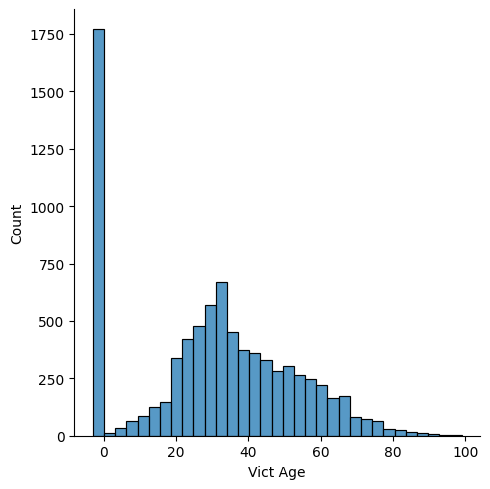

In [31]:
# Histograma que nos muestre la distribución del índice Vict Age

sns.displot(df_crimen['Vict Age'], kind= "hist")

Del gráfico anterior, se desprende que la mayor concentración del índice Vict Age está entre los 20 y 40 años, pero sería valioso agregar el valor promedio de Vict Age en nuestra muestra.

In [32]:
import matplotlib.pyplot as plt   # Importamos la libreria matplotlib


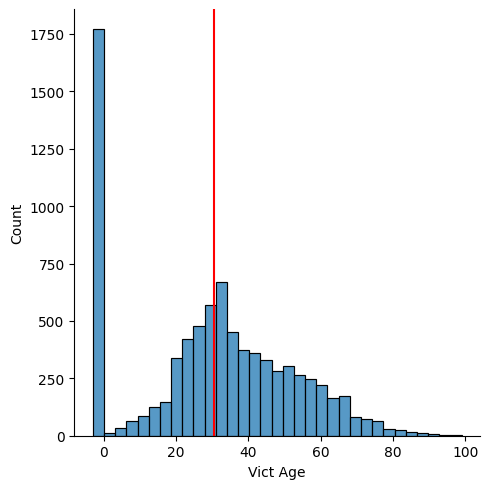

In [33]:
# Visualizacion concreta de donde estan mas concentrados los datos

sns.displot(df_crimen['Vict Age'], kind= "hist")
plt.axvline(df_crimen["Vict Age"].mean(), color = "red")

Ahora utilizaremos gráficos de barras para observar comparaciones de comportamiento de regiones versus el resto del mundo.

Ya habíamos creado el filtros de df_Wilshire y y ahora crearemos el filtro df_Hollywood comparar las victimas.

In [34]:
# Creamos el filtro de Hollywood

df_Hollywood = df_crimen[df_crimen['AREA NAME']=="Hollywood"]

In [35]:
# Calculamos la media de Wilshire y de Hollywood

media_Wilshire = df_Wilshire["Vict Age"].mean()
media_Hollywood = df_Hollywood["Vict Age"].mean()

<Axes: xlabel='AREA NAME', ylabel='Vict Age'>

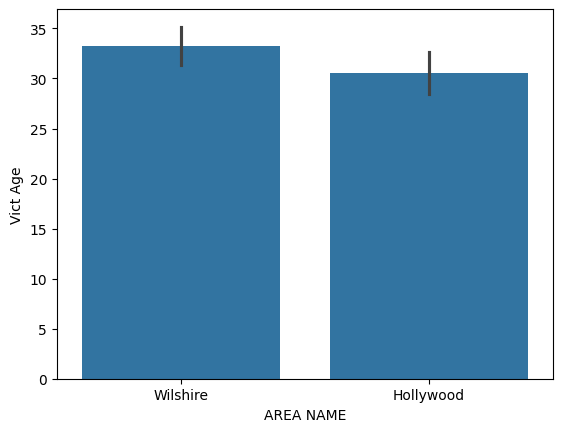

In [36]:
# Graficamos comparando ambas areas

df_euafr = df_crimen.loc[df_crimen["AREA NAME"].isin(["Wilshire","Hollywood"])]
sns.barplot(data=df_euafr, x="AREA NAME", y="Vict Age")

In [37]:
# Otro gráfico de barras: Crimenes en edad promedio entre Central y el resto de los estados

# Filtrar los datos para Central y el resto de los estados
df_central = df_crimen[df_crimen['AREA NAME'] == 'Central']
df_resto_estados = df_crimen[df_crimen['AREA NAME'] != 'Central']

In [38]:
# Calcular Las victimas en edad promedio para cada grupo
victimas_edad_promedio_central = df_central ['Vict Age'].mean()
victimas_edad_promedio_resto_estados = df_resto_estados['Vict Age'].mean()

<Axes: >

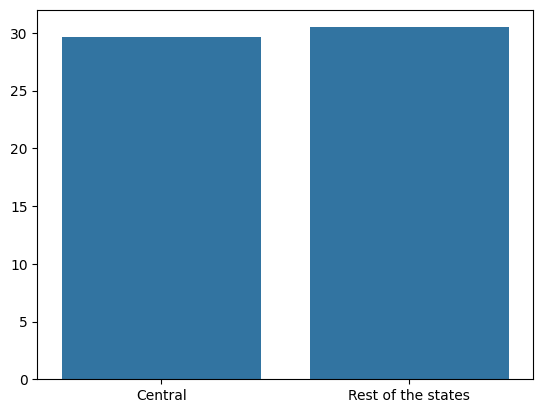

In [39]:
# Creamos el gráfico de barras utilizando sns.barplot
sns.barplot(x=['Central', 'Rest of the states'], y=[victimas_edad_promedio_central, victimas_edad_promedio_resto_estados])

<Axes: xlabel='Vict Sex', ylabel='Vict Age'>

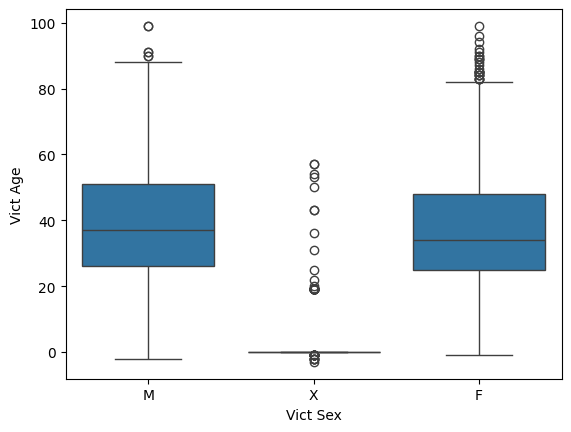

In [40]:
# Ahora usando gráfico Boxplot para observar la distribución de la Victima en años segun su sexo

sns.boxplot(x=df_crimen["Vict Sex"], y=df_crimen["Vict Age"])

In [65]:
#Otra forma de observar la información es a traves de los diagramas de dispersión, pero para usar estos necesitamos eliminar datos perdidos en el dataset.
df_limpio = df_crimen.dropna()

In [66]:
df_limpio

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,VictAge_recodificada
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220,Mission,1974,BATTERY - SIMPLE ASSAULT,26,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,9000 CEDROS AV,0
11,221908151,04/12/2022 12:00:00 AM,10/01/2020 12:00:00 AM,1,Mission,1988,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,8,F,H,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,13400 RANGOON ST,0
12,230204214,01/05/2023 12:00:00 AM,02/01/2020 12:00:00 AM,800,Rampart,201,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,900 N MARIPOSA AV,0
13,230409878,06/19/2023 12:00:00 AM,04/11/2020 12:00:00 AM,1200,Hollenbeck,417,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,8,F,H,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,4400 MOONSTONE DR,0
19,210705560,11/27/2020 12:00:00 AM,11/27/2020 12:00:00 AM,1800,Wilshire,776,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",31,F,O,STREET,307.0,VEHICLE,Adult Arrest,4500 LOMITA ST,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8172,201821055,11/24/2020 12:00:00 AM,11/24/2020 12:00:00 AM,425,Southeast,1837,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",62,M,B,TRANSITIONAL HOUSING/HALFWAY HOUSE,500.0,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,1600 E 109TH ST,1
8174,201226513,12/16/2020 12:00:00 AM,12/16/2020 12:00:00 AM,1220,77th Street,1253,"SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",19,M,B,STREET,106.0,UNKNOWN FIREARM,Invest Cont,77TH ST,0
8175,201818524,10/08/2020 12:00:00 AM,10/08/2020 12:00:00 AM,1940,Southeast,1801,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",20,M,B,STREET,102.0,HAND GUN,Invest Cont,93RD ST,0
8178,201609044,05/14/2020 12:00:00 AM,05/14/2020 12:00:00 AM,300,Foothill,1655,INTIMATE PARTNER - SIMPLE ASSAULT,63,M,W,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,10200 KALUA DR,1


<Axes: xlabel='AREA NAME', ylabel='Vict Age'>

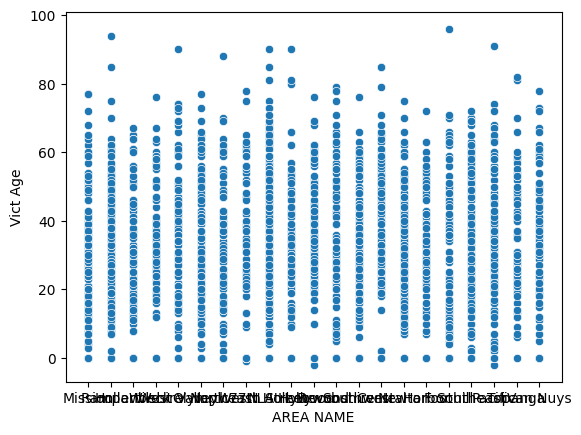

In [43]:
sns.scatterplot(x=df_limpio["AREA NAME"], y=df_limpio["Vict Age"])

El último tipo de gráfico que revisaremos en este taller, corresponde al mapa de calor o heatmap. Este tipo de gráfico es una representación visual de los datos en que se muestra concentración o intensidad.

En este caso lo utilizaremos para buscar correlación entre las distintas variables de nuestro dataset.

## **¿Qué es correlación?**

Correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente. Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.

In [44]:
corr = df_crimen.corr()

<ipython-input-44-443e99306f23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_crimen.corr()


<Axes: >

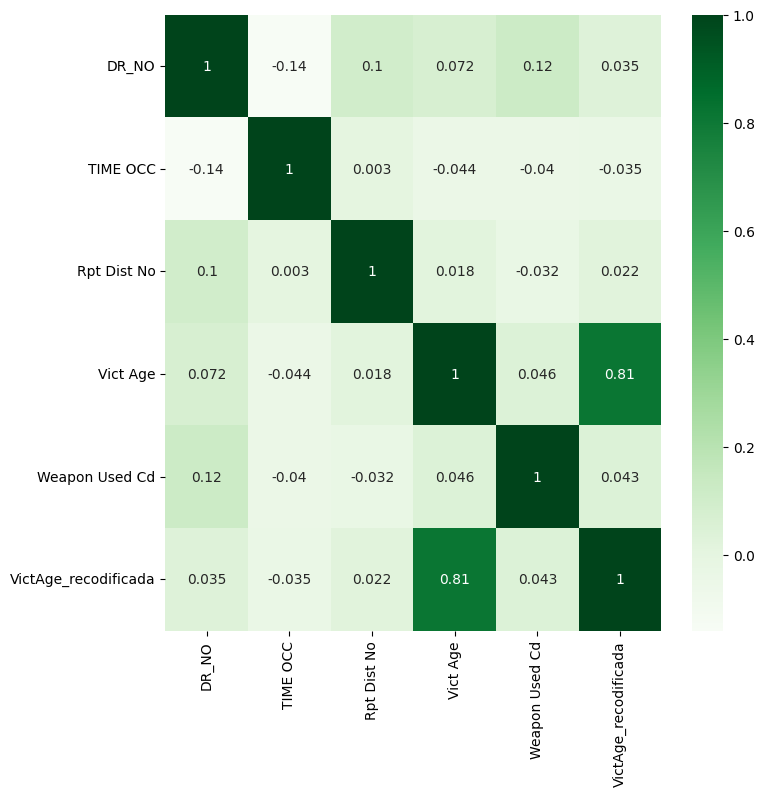

In [48]:
plt.rcParams["figure.figsize"] =(8,8)
sns.heatmap(corr, cmap="Greens", annot=True)

Dentro de las principales correlaciones existentes, nos encontramos con la correlación positiva entre mortalidad Vic Age y Vic Age recodificada.

# **Por último, sección de modelación**

La regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente  Y ,  m  variables independientes  Xi  y un término aleatorio (de error)  e .

yi=β0+β1xi1+...+βmxim+ϵi

La principal motivación es mostrar cuánto de la variabilidad de la variable dependiente  Y  es explicado por la variabilidad de las variables independientes  Xi .

Para trabajar el modelo de regresión lineal es fundamental usar datos limpios de valores perdidos, por lo que utilizaremos el dataset que llamamos data_limpia.

Y los pasos a seguir para implementar el modelo de regresión lineal más simple:

1. Plantear el modelo con su formula
2. Ajustar el modelo utilizando el método .fit()
3. Mostrar los resultados del modelo

In [ ]:
# ¿Cual es la relacion entre AREA NAME y Vict Age?
modelo1 = smf.ols('AREA NAME ~ Vict Age', data=df_limpio)

In [ ]:
modelo1 = modelo1.fit()

In [ ]:
modelo1.summary()